In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [49]:
df = pd.read_csv(r'C:\Users\Aboubakr\Desktop\PFE\diabetes.csv')
data = pd.read_csv(r'C:\Users\Aboubakr\Desktop\PFE\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
#target = df['Outcome']
#df.drop('Outcome',axis=1,inplace=True)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [44]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
target.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

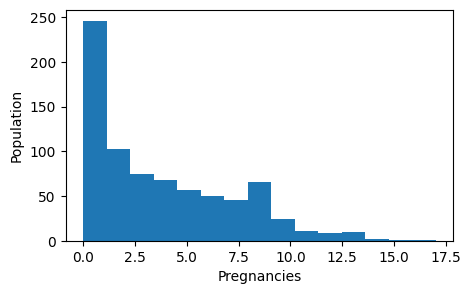

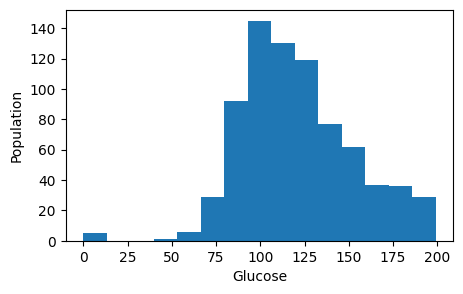

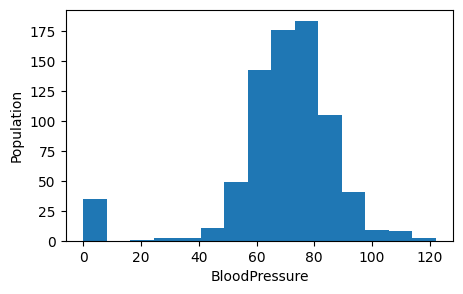

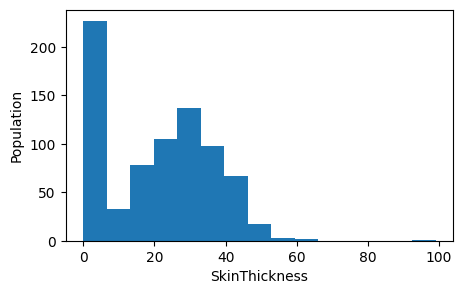

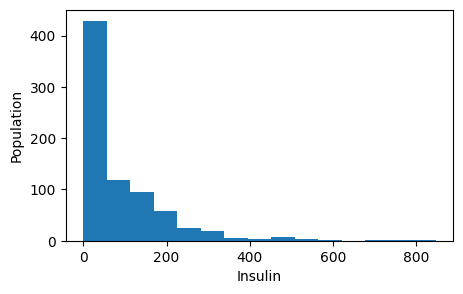

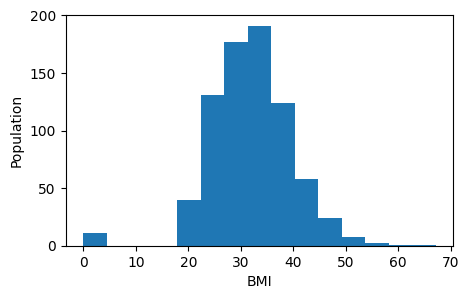

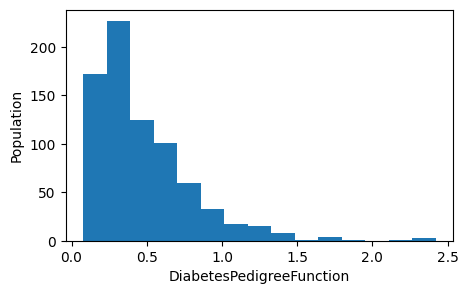

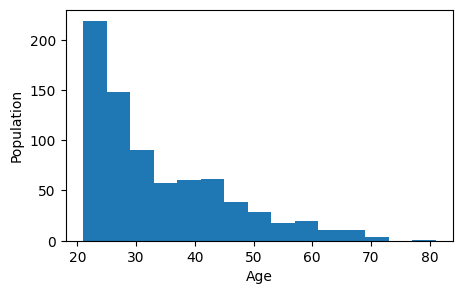

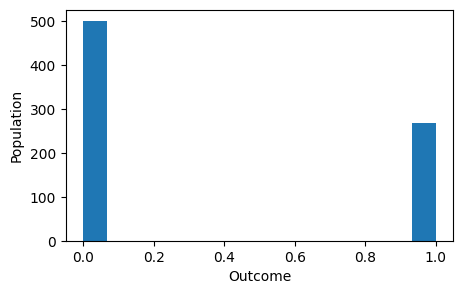

In [20]:
for c in df.columns:
    plt.figure(figsize=(5,3))
    plt.hist(df[c],bins=15)
    plt.xlabel(c)
    plt.ylabel('Population')
    plt.show()
plt.figure(figsize=(5,3))
plt.hist(target,bins=15)
plt.xlabel('Outcome')
plt.ylabel('Population')
plt.show()

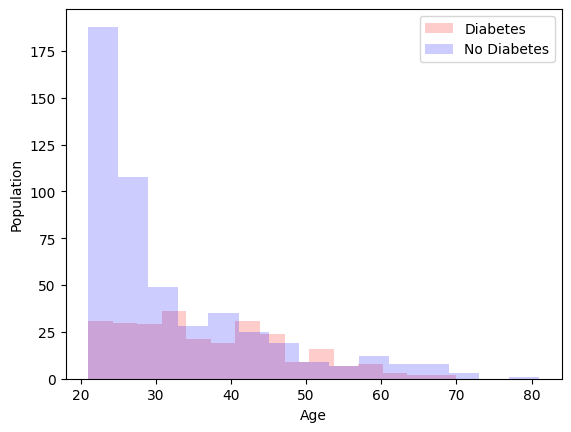

In [21]:
# example: plot histograms of Age for Outcome=1 and Outcome=0.
plt.figure()
plt.hist(data[data.Outcome==1]['Age'],bins=15,label='Diabetes',color='r',alpha=0.2)
plt.hist(data[data.Outcome==0]['Age'],bins=15,label='No Diabetes',color='b',alpha=0.2)
plt.xlabel('Age')
plt.ylabel('Population')
plt.legend()
plt.show()

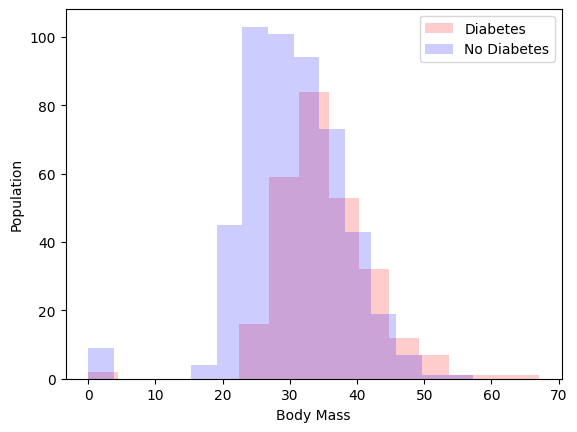

In [22]:
# example: plot histograms of Age for Outcome=1 and Outcome=0.
plt.figure()
plt.hist(data[data.Outcome==1]['BMI'],bins=15,label='Diabetes',color='r',alpha=0.2)
plt.hist(data[data.Outcome==0]['BMI'],bins=15,label='No Diabetes',color='b',alpha=0.2)
plt.xlabel('Body Mass')
plt.ylabel('Population')
plt.legend()
plt.show()

Text(0, 0.5, 'BloodPressure')

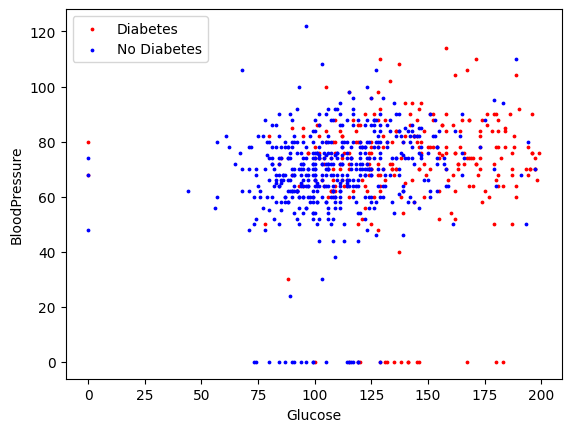

In [23]:
# plot Glucose vs BloodPressure and color points according to Outcome
plt.figure()
plt.scatter(data[data.Outcome==1].Glucose,data[data.Outcome==1].BloodPressure,label='Diabetes',color='r',s=3)
plt.scatter(data[data.Outcome==0].Glucose,data[data.Outcome==0].BloodPressure,label='No Diabetes',color='b',s=3)
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

Text(0, 0.5, 'BMI')

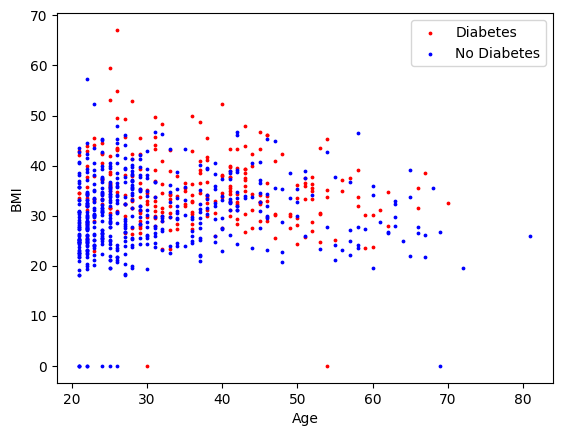

In [24]:
# plot Glucose vs BloodPressure and color points according to Outcome
plt.figure()
plt.scatter(data[data.Outcome==1].Age,data[data.Outcome==1].BMI,label='Diabetes',color='r',s=3)
plt.scatter(data[data.Outcome==0].Age,data[data.Outcome==0].BMI,label='No Diabetes',color='b',s=3)
plt.legend()
plt.xlabel('Age')
plt.ylabel('BMI')

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (614, 8)
X_test :  (154, 8)
y_train :  (614,)
y_test :  (154,)


In [26]:
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\n\nscaler.fit(X_test)\nX_test = scaler.transform(X_test)\n'

In [29]:


# Define a set of individual models
DT_model_1 = DecisionTreeClassifier()
DT_model_2 = DecisionTreeClassifier()
SVM_model_1 = SVC(probability=True)
SVM_model_2 = SVC(probability=True)
NB_model_1 = GaussianNB()
NB_model_2 = GaussianNB()

# Define the ensemble model
super_model = VotingClassifier(estimators=[('dt', DT_model_1), ('svm', SVM_model_1), ('gnb', NB_model_1)], voting='soft')

# Train the ensemble model on the training data
super_model.fit(X_train, y_train)
DT_model_2.fit(X_train, y_train)
SVM_model_2.fit(X_train, y_train)
NB_model_2.fit(X_train, y_train)

# Generate predictions on the test data using the ensemble model
super_pred = super_model.predict(X_test)
DT_pred = DT_model_2.predict(X_test)
SVM_pred = SVM_model_2.predict(X_test)
NB_pred = NB_model_2.predict(X_test)

# Evaluate the performance of the ensemble model
super_acc = accuracy_score(y_test, super_pred)
DT_acc = accuracy_score(y_test, DT_pred)
SVM_acc = accuracy_score(y_test, SVM_pred)
NB_acc = accuracy_score(y_test, NB_pred)

print("super_model accuracy: ", super_acc)
print("DT accuracy: ", DT_acc)
print("SVM accuracy: ", SVM_acc)
print("NB accuracy: ", NB_acc)


super_model accuracy:  0.8116883116883117
DT accuracy:  0.7597402597402597
SVM accuracy:  0.7662337662337663
NB accuracy:  0.7662337662337663


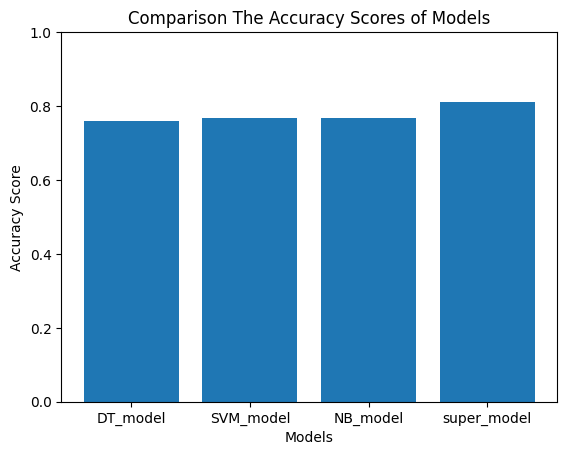

In [30]:
# Accuracy scores for the four models
model_names = ['DT_model', 'SVM_model', 'NB_model', 'super_model']
accuracy_scores = [DT_acc, SVM_acc, NB_acc, super_acc]

# Plotting the accuracy scores
plt.bar(model_names, accuracy_scores)
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison The Accuracy Scores of Models')

# Display the plot
plt.show()

In [31]:
super_matrix = confusion_matrix(y_test, super_pred)
DT_matrix = confusion_matrix(y_test, DT_pred)
SVM_matrix = confusion_matrix(y_test, SVM_pred)
NB_matrix = confusion_matrix(y_test, NB_pred)

print("super_model confusion_matrix: \n",super_matrix)

print("DT confusion_matrix: \n", DT_matrix)

print("SVM confusion_matrix: \n", SVM_matrix)

print("NB confusion_matrix: \n", NB_matrix)


super_model confusion_matrix: 
 [[86 13]
 [16 39]]
DT confusion_matrix: 
 [[77 22]
 [15 40]]
SVM confusion_matrix: 
 [[87 12]
 [24 31]]
NB confusion_matrix: 
 [[79 20]
 [16 39]]


super_model confusion_matrix: 



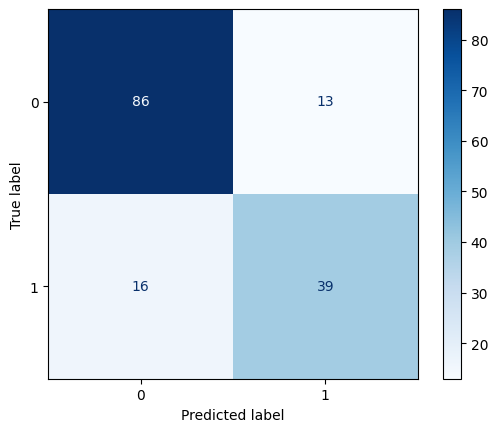

In [32]:
print("super_model confusion_matrix: \n")
ConfusionMatrixDisplay.from_predictions(y_test, super_pred, cmap = 'Blues', values_format='.2g')

DT confusion_matrix: 



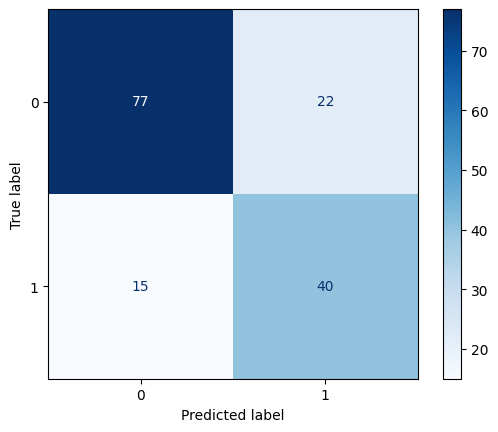

In [33]:
print("DT confusion_matrix: \n")
ConfusionMatrixDisplay.from_predictions(y_test, DT_pred, cmap = 'Blues', values_format='.2g')


SVM confusion_matrix: 



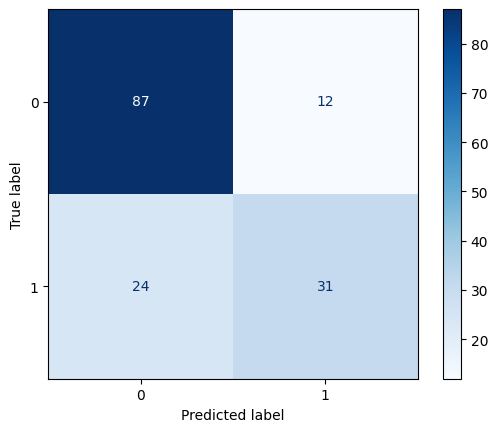

In [34]:
print("SVM confusion_matrix: \n")
ConfusionMatrixDisplay.from_predictions(y_test, SVM_pred, cmap = 'Blues', values_format='.2g')

NB confusion_matrix: 



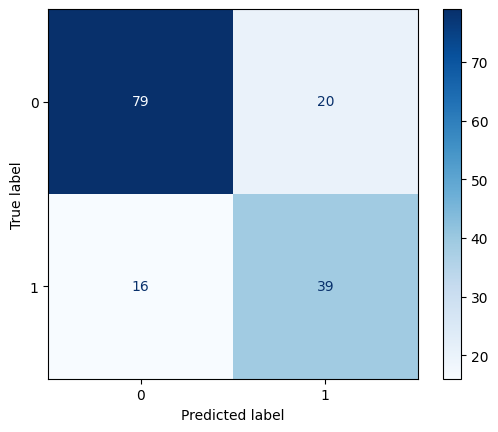

In [45]:
print("NB confusion_matrix: \n")
ConfusionMatrixDisplay.from_predictions(y_test, NB_pred,cmap = 'Blues', values_format='.2g')

In [35]:
import pickle
with open(r'C:\Users\Aboubakr\Desktop\PFE\Application\super_model','wb') as file:
    pickle.dump(super_model,file)

In [36]:
with open(r'C:\Users\Aboubakr\Desktop\PFE\Application\super_model','rb') as f :
    super_m = pickle.load(f)

In [60]:
verify = [[33,33,33,33,33,33,33,33]]
s = list(df.columns)
verify = pd.DataFrame(verify,columns=s)

m = super_m.predict(verify)